In [196]:
!pip install imblearn
!pip install pandas
!pip install scikit-learn
!pip install seaborn

In [197]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [198]:
data = pd.read_csv("trainset.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(29271, 15)
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'nr.employed', 'Subscribed']


In [199]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


In [200]:
data['education'].unique()

array(['basic.4y', 'university.degree', 'basic.9y', 'professional.course',
       'unknown', 'high.school', 'basic.6y', 'illiterate'], dtype=object)

In [201]:
data['Subscribed'].value_counts()

no     26075
yes     3196
Name: Subscribed, dtype: int64

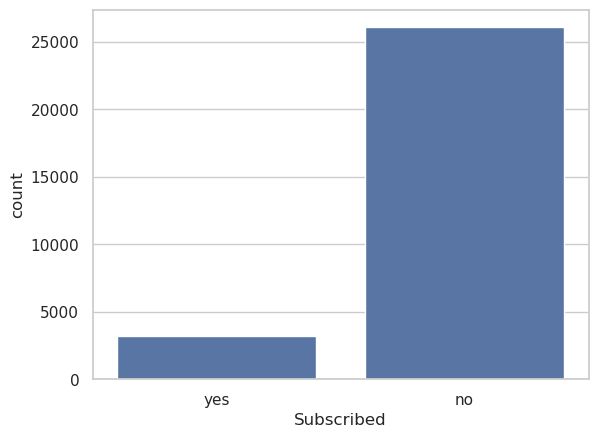

<Figure size 640x480 with 0 Axes>

In [202]:
sns.countplot(x='Subscribed', data=data)
plt.show()
plt.savefig('count_plot')

In [203]:
count_no_sub = len(data[data['Subscribed']=='no'])
count_sub = len(data[data['Subscribed']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)


percentage of no subscription is 89.08134330907724
percentage of subscription 10.918656690922756


In [204]:
data.groupby('Subscribed').mean(numeric_only=True)

,age,duration,campaign,pdays,nr.employed
Subscribed,,,,,
no,40.186232,221.810086,2.807900,997.893538,5213.452004
yes,39.635795,629.597309,2.163642,909.438673,5139.377034


In [205]:
data.groupby('job').mean(numeric_only=True)


,age,duration,campaign,pdays,nr.employed
job,,,,,
admin.,38.548612,262.607411,2.811021,984.598523,5204.888418
blue-collar,40.019113,274.839630,2.712110,994.249515,5207.694893
entrepreneur,41.674482,274.083859,2.648332,991.828674,5204.215239
housemaid,44.239156,249.269637,2.732708,992.000000,5209.740445
management,42.506155,264.638258,2.630208,986.285985,5201.845975
retired,57.331924,277.244186,2.866808,974.853066,5192.067548
self-employed,40.568533,275.731660,2.858108,985.553089,5204.681178
services,38.271091,270.128486,2.707024,991.628309,5206.295023
student,27.418530,337.095847,2.322684,948.246006,5160.907668


In [206]:
data.groupby('marital').mean(numeric_only=True)


,age,duration,campaign,pdays,nr.employed
marital,,,,,
divorced,43.949762,261.785969,2.750595,991.321344,5207.054073
married,42.012019,262.706586,2.738620,989.321749,5206.282433
single,33.745347,276.834918,2.721248,984.231088,5202.369688
unknown,42.470588,336.803922,3.882353,979.490196,5201.290196


In [207]:
data.groupby('education').mean(numeric_only=True)


,age,duration,campaign,pdays,nr.employed
education,,,,,
basic.4y,46.269381,265.087296,2.779153,992.526059,5206.635309
basic.6y,40.319716,280.455299,2.660746,990.761989,5205.425400
basic.9y,39.528048,274.488873,2.694715,991.858368,5206.056212
high.school,38.268322,271.670730,2.738382,989.312662,5205.029453
illiterate,48.600000,299.333333,2.133333,932.800000,5187.840000
professional.course,40.036022,255.151397,2.727747,987.066040,5207.242469
university.degree,39.103714,261.659776,2.753679,984.252278,5204.293109
unknown,43.841076,259.949470,2.810921,987.646292,5203.276447


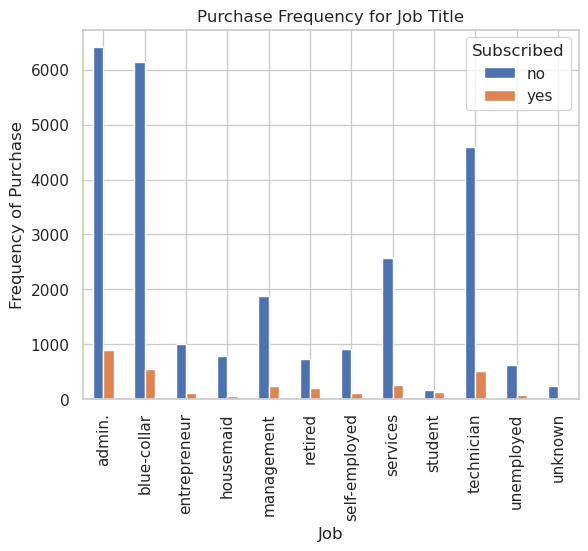

In [208]:
%matplotlib inline
pd.crosstab(data.job,data.Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')


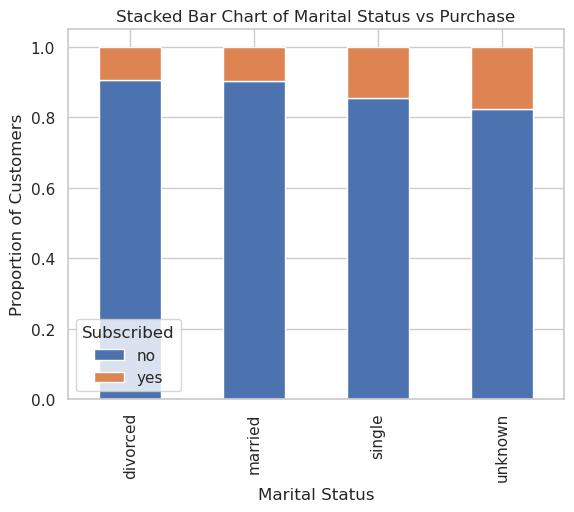

In [209]:
table=pd.crosstab(data.marital,data.Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


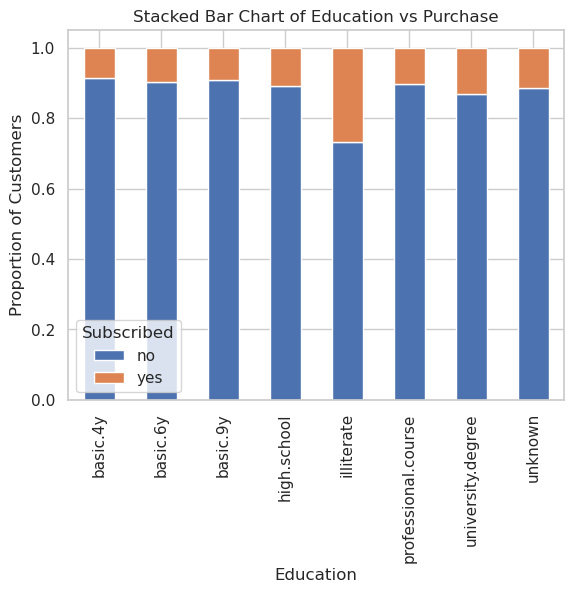

In [210]:
table=pd.crosstab(data.education,data.Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')


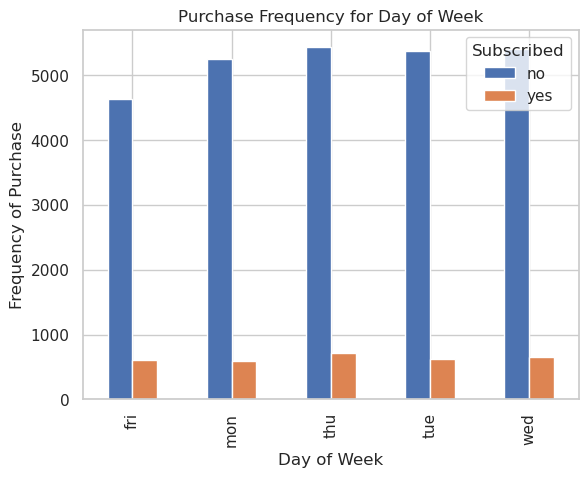

In [211]:
pd.crosstab(data.day_of_week,data.Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')


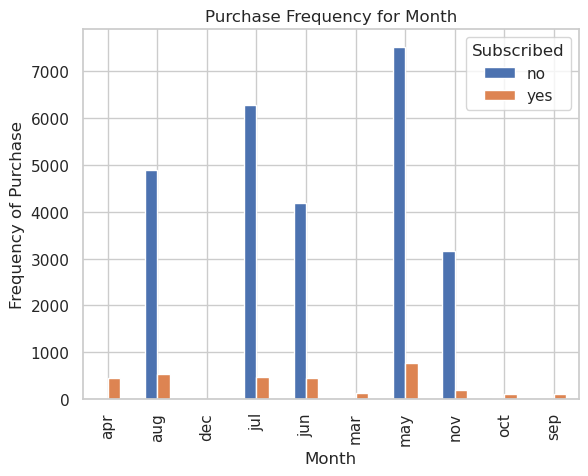

In [212]:
pd.crosstab(data.month,data.Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')


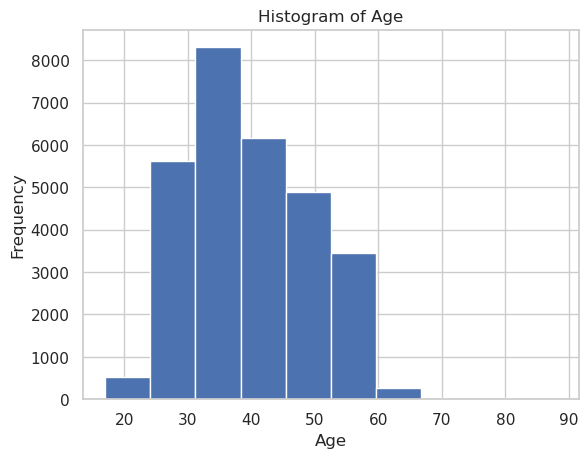

In [213]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


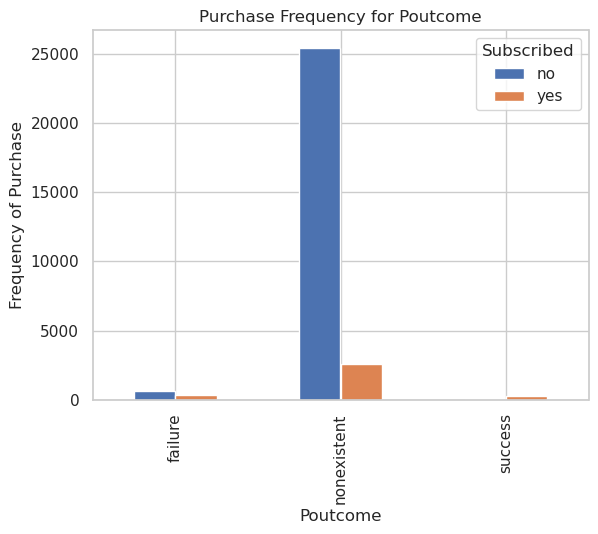

In [214]:
pd.crosstab(data.poutcome,data.Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')


In [215]:
data = pd.read_csv("dataset.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))
cat_vars=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


(29271, 15)
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'nr.employed', 'Subscribed']


In [216]:
data_final=data[to_keep]
data_final.columns.values


array(['age', 'duration', 'campaign', 'pdays', 'nr.employed',
       'Subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'da

In [217]:
X = data_final.loc[:, data_final.columns != 'Subscribed']
y = data_final.loc[:, data_final.columns == 'Subscribed']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# Use fit_resample instead of fit_sample
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Subscribed'])

# Check the numbers of our data
print("length of oversampled data is ", len(os_data_X))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['Subscribed'] == 'no']))
print("Number of subscription", len(os_data_y[os_data_y['Subscribed'] == 'yes']))
print("Proportion of no subscription data in oversampled data is ", len(os_data_y[os_data_y['Subscribed'] == 'no']) / len(os_data_X))
print("Proportion of subscription data in oversampled data is ", len(os_data_y[os_data_y['Subscribed'] == 'yes']) / len(os_data_X))


length of oversampled data is  36524
Number of no subscription in oversampled data 18262
Number of subscription 18262
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [218]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# # Scale the data
# scaler = StandardScaler()
# os_data_X_scaled = scaler.fit_transform(os_data_X)

# # Create RFE object with the estimator
# rfe = RFE(estimator=logreg)

# # Fit the RFE model and specify the number of features to select
# rfe = rfe.fit(os_data_X_scaled, os_data_y.values.ravel())

# # Print the results
# print(rfe.support_)
# print(rfe.ranking_)


In [219]:
cols=['job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['Subscribed']
print(y)
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())


0        yes
1         no
2         no
3         no
4         no
        ... 
36519    yes
36520    yes
36521    yes
36522    yes
36523    yes
Name: Subscribed, Length: 36524, dtype: object


In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



# Assuming X and y are your feature matrix and target variable
# Replace this with your actual data
X = data_final.drop('Subscribed', axis=1)
y = data_final['Subscribed']

# Convert 'yes' and 'no' to binary 1 and 0
y_numeric = y.map({'yes': 1, 'no': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [221]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9420405374629924


In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[7542  271]
 [ 238  731]]


In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7813
           1       0.73      0.75      0.74       969

    accuracy                           0.94      8782
   macro avg       0.85      0.86      0.85      8782
weighted avg       0.94      0.94      0.94      8782



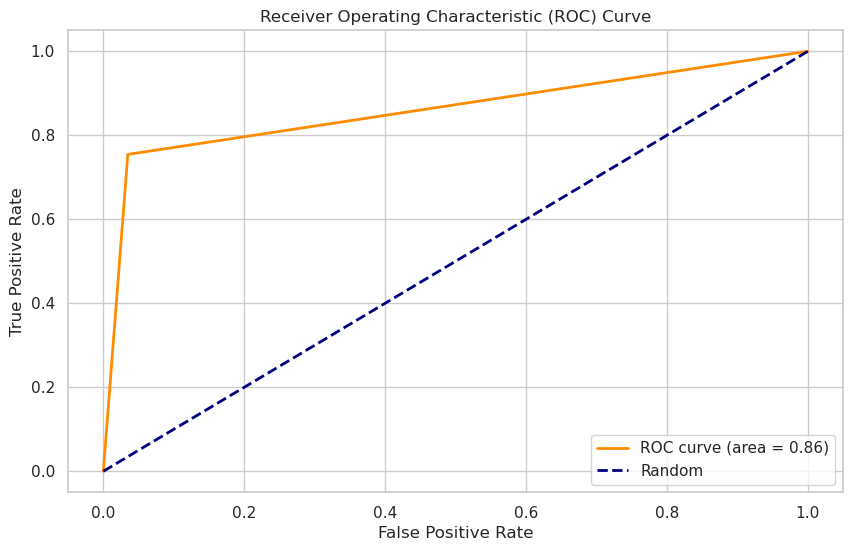

In [224]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained DecisionTreeClassifier, and 'X_test' and 'y_test' are your test data
y_score = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
